ARIMA BASELINE MODEL CPI PREDICTION

In [ ]:
!pip install -q --no-cache-dir "numpy==1.26.4" "scipy==1.10.0" "pmdarima>=2.0.4" statsmodels scikit-learn pandas openpyxl
import os, sys
os.kill(os.getpid(), 9)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Colab/Notebook plotting
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)


In [3]:
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(42)
np.random.seed(42)


In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from pmdarima import auto_arima


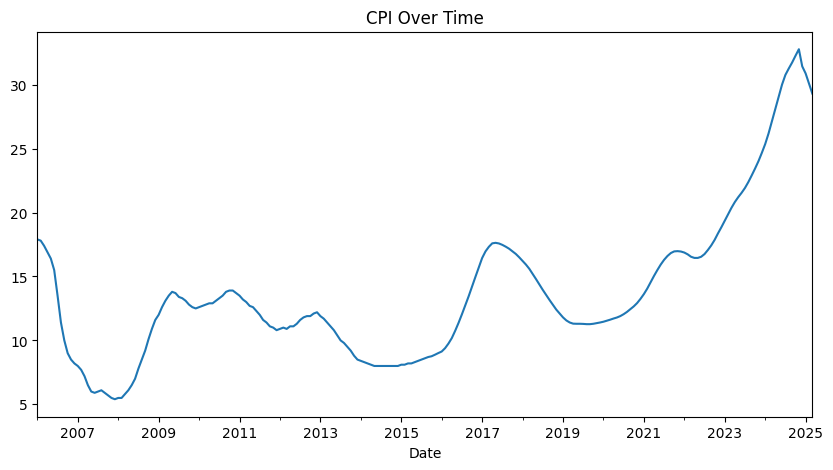

In [5]:
# Loading dataset
df = pd.read_excel("cleaned_real_economic_indicators_dataset.xlsx", engine='openpyxl')

# Ensuring Date column is datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Focussing only on the CPI column for ARIMA
y = df['CPI']

# Quick check
y.plot(title="CPI Over Time", figsize=(10,5))
plt.show()

In [6]:
# Train-Test Split (80/20 Chronological)
split = int(len(y) * 0.8)
y_train, y_test = y[:split], y[split:]

print("Training samples:", len(y_train))
print("Testing samples:", len(y_test))


Training samples: 184
Testing samples: 47


📊 ARIMA(1,1,1) Performance:
MAE:  4.6521
MSE:  44.3221
RMSE: 6.6575
R²:   -0.3615


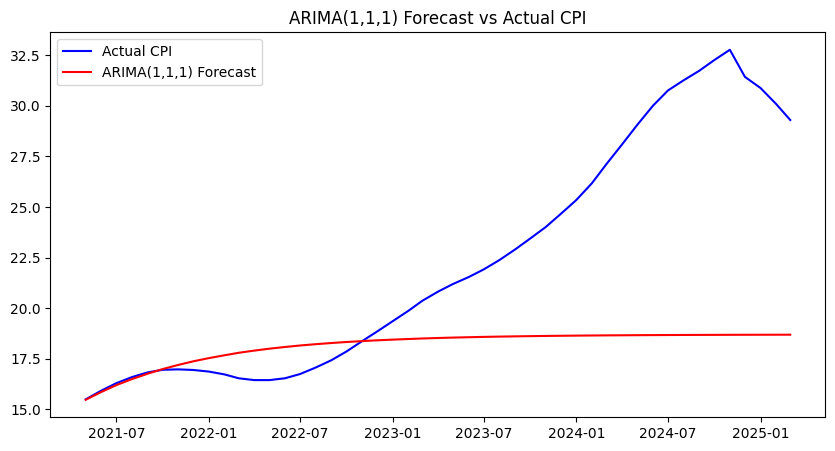

In [7]:
# Baseline ARIMA Model
# Start simple with ARIMA(1,1,1)
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Forecast on test set
forecast = model_fit.forecast(steps=len(y_test))

# Evaluating performance
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forecast)

print("📊 ARIMA(1,1,1) Performance:")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual CPI", color="blue")
plt.plot(y_test.index, forecast, label="ARIMA(1,1,1) Forecast", color="red")
plt.legend()
plt.title("ARIMA(1,1,1) Forecast vs Actual CPI")
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-144.134, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=199.056, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-136.425, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26.885, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=197.319, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-146.134, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-57.929, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-146.127, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-144.135, Time=0.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-102.885, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-145.815, Time=0.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-142.135, Time=1.27 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-148.134, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-59.824, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0]             : A

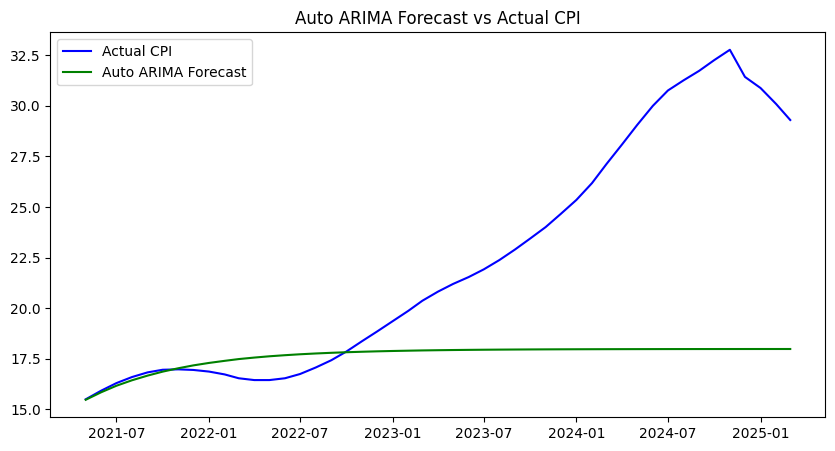

In [8]:
# Auto ARIMA trying multiple (p,d,q) and pick the best one
auto_model = auto_arima(y_train, seasonal=False, stepwise=True, trace=True)

# Forecast with best ARIMA
auto_forecast = auto_model.predict(n_periods=len(y_test))

# Evaluate performance
mae_auto = mean_absolute_error(y_test, auto_forecast)
mse_auto = mean_squared_error(y_test, auto_forecast)
rmse_auto = np.sqrt(mse_auto)
r2_auto = r2_score(y_test, auto_forecast)

print("\n📊 Auto ARIMA Performance:")
print(f"MAE:  {mae_auto:.4f}")
print(f"MSE:  {mse_auto:.4f}")
print(f"RMSE: {rmse_auto:.4f}")
print(f"R²:   {r2_auto:.4f}")

# Plot actual vs predicted (AutoARIMA)
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual CPI", color="blue")
plt.plot(y_test.index, auto_forecast, label="Auto ARIMA Forecast", color="green")
plt.legend()
plt.title("Auto ARIMA Forecast vs Actual CPI")
plt.show()


VAR MODEL CPI PREDICTION

In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
# Loading Dataset
df = pd.read_excel("cleaned_real_economic_indicators_dataset.xlsx")

# Ensuring Date column is datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Selecting multiple variables (CPI + key macro indicators)
data = df[['CPI', 'exchange_rate_naira_to_usd', 'money_supply', 'currency_in_circulation']].dropna()

print("Data shape:", data.shape)
print(data.head())

Data shape: (231, 4)
             CPI  exchange_rate_naira_to_usd  money_supply  currency_in_circulation
Date                                                                               
2006-01-01  17.9                     129.250     2967139.5                 572747.4
2006-02-01  17.8                     128.250     2227472.8                 561626.4
2006-03-01  17.4                     128.000     3307667.9                 563713.0
2006-04-01  16.9                     128.375     3540703.6                 610130.3
2006-05-01  16.4                     128.750     3684404.5                 611224.3


In [11]:
# Train-Test Split (80/20 chronological)
split = int(len(data) * 0.8)
train, test = data[:split], data[split:]

print("Training samples:", len(train))
print("Testing samples:", len(test))


Training samples: 184
Testing samples: 47


In [12]:
# Fit VAR Model
model = VAR(train)
# Determine optimal lag length using multiple predictors
lag_order = model.select_order(maxlags=6)
 # try up to 6 lags
print("Lag Order Selection:\n", lag_order.summary())

# Fit VAR with chosen lag (AIC criterion usually good)
var_model = model.fit(maxlags=6, ic='aic')

print(var_model.summary())


Lag Order Selection:
  VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       63.27       63.34   2.996e+27       63.30
1       51.01       51.37   1.423e+22       51.15
2      49.19*      49.83*  2.307e+21*      49.45*
3       49.27       50.20   2.503e+21       49.65
4       49.38       50.59   2.788e+21       49.87
5       49.47       50.97   3.064e+21       50.08
6       49.58       51.37   3.437e+21       50.31
-------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 19, Aug, 2025
Time:                     13:00:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    49.8103
Nobs:                     182.000    HQIC:                   49.4335
Log likelihood:          -5472.05    FPE:     

In [13]:
# Forecast on Test Set
# Forecast same length as test set
forecast_input = train.values[-var_model.k_ar:]
forecast = var_model.forecast(y=forecast_input, steps=len(test))

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Extract CPI forecast & actual
cpi_forecast = forecast_df['CPI']
cpi_actual = test['CPI']


In [14]:
# Evaluation Metrics (VAR for CPI) ---
mae_var = mean_absolute_error(cpi_actual, cpi_forecast)
mse_var = mean_squared_error(cpi_actual, cpi_forecast)
rmse_var = np.sqrt(mse_var)
r2_var = r2_score(cpi_actual, cpi_forecast)

print("📊 VAR Model Performance (CPI):")
print(f"MAE:  {mae_var:.4f}")
print(f"MSE:  {mse_var:.4f}")
print(f"RMSE: {rmse_var:.4f}")
print(f"R²:   {r2_var:.4f}")


📊 VAR Model Performance (CPI):
MAE:  5.2151
MSE:  51.3078
RMSE: 7.1629
R²:   -0.5761


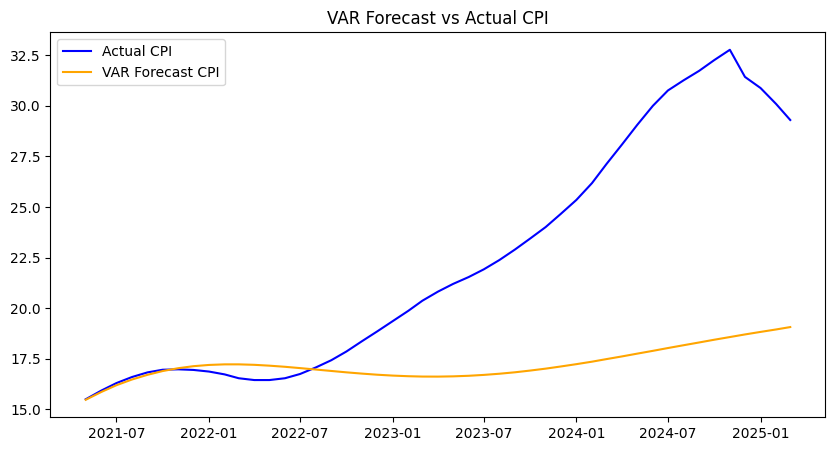

In [15]:
# Visualization
plt.figure(figsize=(10,5))
plt.plot(cpi_actual.index, cpi_actual, label="Actual CPI", color="blue")
plt.plot(cpi_forecast.index, cpi_forecast, label="VAR Forecast CPI", color="orange")
plt.legend()
plt.title("VAR Forecast vs Actual CPI")
plt.show()


In [16]:
# Comparison Table with ARIMA ---
results_df = pd.DataFrame([
    {"Model": "ARIMA(1,1,1)", "MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2},
    {"Model": "VAR", "MAE": mae_var, "MSE": mse_var, "RMSE": rmse_var, "R²": r2_var}
])

print("📊 Evaluation Metrics: ARIMA vs VAR")
display(results_df)

📊 Evaluation Metrics: ARIMA vs VAR


,Model,MAE,MSE,RMSE,R²
0,"ARIMA(1,1,1)",4.652078,44.322122,6.657486,-0.361531
1,VAR,5.215115,51.307802,7.162946,-0.576123
